<a href="https://colab.research.google.com/github/Rajeshveluguri/Pythoncodes/blob/main/Spam_Message_Detector_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Approach to the Spam Detector

*   Load the data and Libraries
*   Data Audit
*   Data Preparation
    * Tokenization
    * Lemmatization
    * Removal of Stop Words
    * Lower Case
    * Removal of Special Characters
*   Vectorization
    * TFIDF & CountVectorizer
*   Machine Learning
*   Deep Learning using Keras/TensorFlow

Import Libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Import the Data

In [3]:
data = pd.read_csv('/content/spam.csv', encoding = 'latin-1')

In [4]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data = data.iloc[:,:2]

In [7]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='v1'>

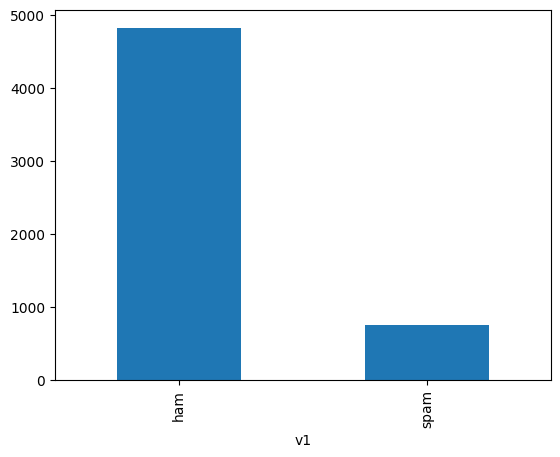

In [8]:
data['v1'].value_counts().plot(kind = 'bar')

In [9]:
data.columns = ['label', 'message']

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
vect = TfidfVectorizer()
x = vect.fit_transform(data['message'])

In [13]:
x.shape

(5572, 8672)

CSR - Compressed Sparse row matrix

In [14]:
vect.vocabulary_

{'go': 3550,
 'until': 8030,
 'jurong': 4350,
 'point': 5920,
 'crazy': 2327,
 'available': 1303,
 'only': 5537,
 'in': 4087,
 'bugis': 1751,
 'great': 3634,
 'world': 8489,
 'la': 4476,
 'buffet': 1749,
 'cine': 2048,
 'there': 7645,
 'got': 3594,
 'amore': 1069,
 'wat': 8267,
 'ok': 5504,
 'lar': 4512,
 'joking': 4318,
 'wif': 8392,
 'oni': 5533,
 'free': 3358,
 'entry': 2949,
 'wkly': 8447,
 'comp': 2165,
 'to': 7756,
 'win': 8405,
 'fa': 3087,
 'cup': 2386,
 'final': 3207,
 'tkts': 7743,
 '21st': 411,
 'may': 4930,
 '2005': 402,
 'text': 7595,
 '87121': 784,
 'receive': 6297,
 'question': 6190,
 'std': 7230,
 'txt': 7933,
 'rate': 6242,
 'apply': 1156,
 '08452810075over18': 77,
 'dun': 2802,
 'say': 6633,
 'so': 7024,
 'early': 2823,
 'hor': 3927,
 'already': 1042,
 'then': 7640,
 'nah': 5238,
 'don': 2712,
 'think': 7660,
 'he': 3781,
 'goes': 3558,
 'usf': 8075,
 'lives': 4665,
 'around': 1207,
 'here': 3831,
 'though': 7680,
 'freemsg': 3365,
 'hey': 3841,
 'darling': 2443,
 'it

In [15]:
y = data['label']

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 125)

In [18]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457, 8672)
(1115, 8672)
(4457,)
(1115,)


Random Forest Classifier

In [20]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_hat_train_rf = rf.predict(x_train)
y_hat_test_rf = rf.predict(x_test)

UDF for Evaluation

In [22]:
def model_evaluation(actual, predicted):
  cm = confusion_matrix(actual, predicted)
  print(cm)
  print(classification_report(actual, predicted))
  print(accuracy_score(actual, predicted))

In [23]:
model_evaluation(y_train, y_hat_train_rf)

[[3848    0]
 [   0  609]]
              precision    recall  f1-score   support

         ham       1.00      1.00      1.00      3848
        spam       1.00      1.00      1.00       609

    accuracy                           1.00      4457
   macro avg       1.00      1.00      1.00      4457
weighted avg       1.00      1.00      1.00      4457

1.0


In [24]:
model_evaluation(y_test, y_hat_test_rf)

[[977   0]
 [ 17 121]]
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       977
        spam       1.00      0.88      0.93       138

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.99      0.98      0.98      1115

0.9847533632286996


This model is overfit, as recall score on training data is 100% and test data is only 88%

In [29]:
def predict_message(message):
  message_vect = vect.transform([message])
  prediction = rf.predict(message_vect)
  return prediction[0]


In [30]:
# Example usage:
message1 = "Congratulations! You've won a free vacation to the Bahamas!"
prediction1 = predict_message(message1)
print(f"Message: {message1}")
print(f"Prediction: {'Spam' if prediction1 == 'spam' else 'Ham'}")

message2 = "Download caller tunes by sending message to 57272?"
prediction2 = predict_message(message2)
print(f"Message: {message2}")
print(f"Prediction: {'Spam' if prediction2 == 'spam' else 'Ham'}")

Message: Congratulations! You've won a free vacation to the Bahamas!
Prediction: Ham
Message: Download caller tunes by sending message to 57272?
Prediction: Ham


In [31]:
message3 = "Hey, how are you doing today?"
prediction3 = predict_message(message3)
print(f"Message: {message3}")
print(f"Prediction: {'Spam' if prediction3 == 'spam' else 'Ham'}")

Message: Hey, how are you doing today?
Prediction: Ham


### Approach to Keras:

1. Declare a Model
   1. Sequential: Sequence of Layers
   2. Functional: Multiple models with sequences of layers interconnected
2. Declare the Layers
   1. EDense Layers, Dropout Layers
   2. Tune the layers (Number of Neurons, act func, input_shape)
   3. Specify the output Layers
3. Compile the Model
   1. Optimizer (SGD, Adam)
   2. Loss Function (LogLoss/CrossEntropy, RMSE, MSE, MAE)
   3. Metrics for Evaluation (F1, Precision, Recall, Acc)
4. Fit the model
   1. X & Y
   2. Epochs
   3. Verbose = Log of the model run information